In [1]:
import pandas as pd

In [2]:
# Read the Dataset
dataframe = pd.read_csv("./Datasets/uber.csv")

In [3]:
data = dataframe

In [4]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
data.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
# Since we have only 1 row with missing values, we can drop it directly
data.dropna(inplace = True)

In [8]:
data.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
data.drop(["Unnamed: 0", "key"], axis = 1, inplace = True)

In [10]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [11]:
# Convert pickup_datetime column to its proper datatype
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"], errors='coerce')  # to handle errors by coercing invalid parsing to NaT

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


{'whiskers': [<matplotlib.lines.Line2D at 0x25645d8afd0>,
 'caps': [<matplotlib.lines.Line2D at 0x25645d8b250>,
 'boxes': [<matplotlib.lines.Line2D at 0x25645c96e90>],
 'medians': [<matplotlib.lines.Line2D at 0x25645d8b4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25645d8b610>],
 'means': []}

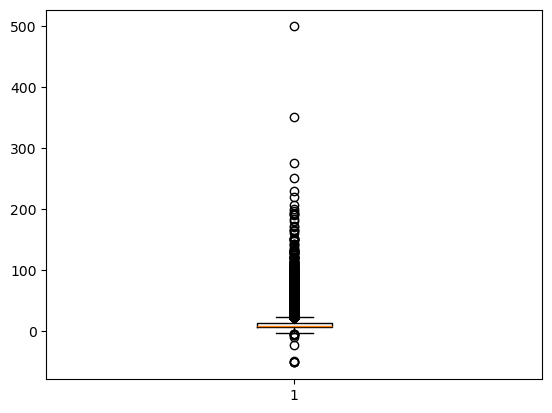

In [13]:
# Visualize the Outliers for fare_amount
import matplotlib.pyplot as plt
plt.boxplot(data["fare_amount"])

In [14]:
# Function to find the Outliers
def find_outliers(df):
    q1 = df.quantile(0.25) # 1st Quartile
    q3 = df.quantile(0.75) # 3d Quartile
    IQR = q3-q1 # InterQuartile Range
    outliers = df[(df<q1-1.5*IQR) | (df>q3+1.5*IQR)]
    return outliers

In [15]:
# Outlier Insights
fare_amount_outliers = find_outliers(data["fare_amount"])
print("Number of Outlier : " + str(len(fare_amount_outliers)))
print("Max Outlier : " + str(fare_amount_outliers.max()))
print("Min Outlier : " + str(fare_amount_outliers.min()))

Number of Outlier : 17166
Max Outlier : 499.0
Min Outlier : -52.0


In [42]:
# Drop the Outliers
q_low = data["fare_amount"].quantile(0.25)
q_hi  = data["fare_amount"].quantile(0.75)
iqr = q_hi - q_low
data = data[(data["fare_amount"] < q_hi+1.5*iqr) & (data["fare_amount"] > q_low-1.5*iqr)]

In [43]:
# Drop Rows having fare_amount as negative
data.drop(data[data['fare_amount'] < 0].index, inplace = True)

<Axes: >

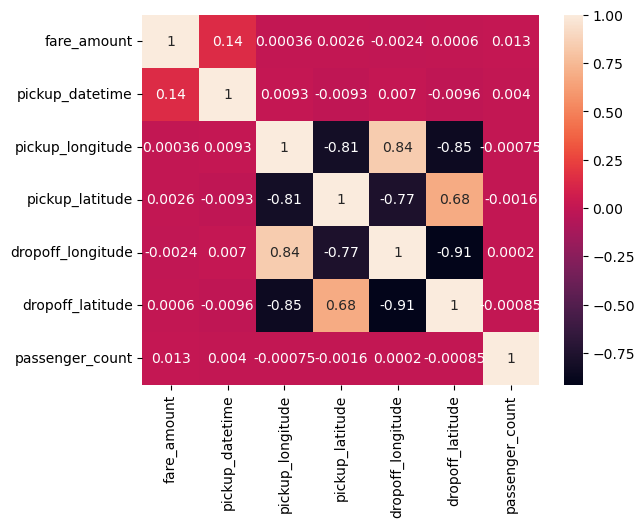

In [20]:
# Co-relation Heatmap
import seaborn as sns
sns.heatmap(data.corr(), annot = True)

In [21]:
x = data.drop("fare_amount", axis = 1) # Independent Set
y = data['fare_amount'] # Target Variable

In [22]:
# Important before we fit the model
x['pickup_datetime'] = pd.to_numeric(pd.to_datetime(x['pickup_datetime']))

In [23]:
from sklearn.model_selection import train_test_split
# Split the Dataset into Testing and Training Parts
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
# Random State is fixed because the nature of splitting the Data into testing and training parts is random,
# Random State helps us reproduce the same results each time

In [24]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train) # Fit the Model

LinearRegression()

In [36]:
predict = lrmodel.predict(x_test)
print(predict)

[9.04274718 9.65695699 8.06734211 ... 8.91498054 9.38638658 8.88803752]


In [37]:
# Analyze the Metric Scores
from sklearn import metrics
import numpy as np
print(f"Mean absolute error {metrics.mean_absolute_error(y_test, predict)}")
print(f"Mean squared error {metrics.mean_squared_error(y_test, predict)}")
print(f"Root mean squared error {np.sqrt(metrics.mean_squared_error(y_test, predict))}")
# print(metrics.r2_score(y_test,predict))

Mean absolute error 3.251846765229943
Mean squared error 16.92269546056991
Root mean squared error 4.1137203916369804


In [29]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
# n_estimators = Number of Decision Trees
rfmodel = RandomForestRegressor(n_estimators=100,random_state=101)
# Fit the Model
rfmodel.fit(x_train,y_train)

RandomForestRegressor(random_state=101)

In [30]:
rfpredict = rfmodel.predict(x_test)
rfpredict

array([ 5.284, 10.515,  5.527, ...,  7.428,  8.405,  4.688])

In [31]:
# Analyze th Metric Scores
from sklearn import metrics
import numpy as np
print(f"Mean absolute error {metrics.mean_absolute_error(y_test, rfpredict)}")
print(f"Mean squared error {metrics.mean_squared_error(y_test, rfpredict)}")
print(f"Root mean squared error {np.sqrt(metrics.mean_squared_error(y_test, rfpredict))}")
# print(metrics.r2_score(y_test,predict))

Mean absolute error 1.4294908111360283
Mean squared error 4.464042857428044
Root mean squared error 2.1128281656178394
